In [1]:
import gym
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('FrozenLake-v0',is_slippery=True)
q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
returns = [[[0]]* env.action_space.n for i in range(env.observation_space.n)]
ep_num = 5000
epsilon = 0.3

In [4]:
w_r = []
TEST_NUM = 5
for k in tqdm(range(5)):
    q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
    win_rates = []
    for i in range(ep_num):
        SA_list = []
        rewards = []
        env.reset()
        state = env.s
        done = False
        G = 0
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_value[state][:])
            new_state, reward, done, _ = env.step(action)
            SA_list.append([state, action])
            rewards.append(reward)
            state = new_state
       # print(SA_list)
        for j in reversed(range(0, len(SA_list))):
            G = 0.9*G + rewards[j]
            if not SA_list[j] in [[x[0], x[1]] for x in SA_list[0:j]]: 
                returns[SA_list[j][0]][SA_list[j][1]].append(G)
                q_value[SA_list[j][0]][SA_list[j][1]] = np.mean(returns[SA_list[j][0]][SA_list[j][1]])
      #  for m in range(env.observation_space.n):
       #     for n in range(4):
        #        q_value[m][n] += np.mean(returns[m][n])

        policy = [np.argmax(actions) for actions in q_value]
        win_rate = 0
        steps = [0 for i in range(TEST_NUM)]
        for i in range(TEST_NUM):
            env.reset()
            done = False
            s = 0
            while not done:
                s, r, done, _ = env.step(policy[s])
                steps[i] += 1
            if r>0:
                win_rate += 1
        win_rates.append(win_rate/100)
    w_r.append(win_rates)
    

 80%|████████  | 4/5 [09:53<02:28, 148.49s/it]


KeyboardInterrupt: ignored

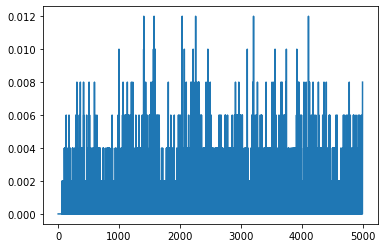

In [ ]:
plt.plot(np.mean(w_r, axis = 0))

In [ ]:
q_value

[[0.7971163843576304,
  0.7966726750831964,
  0.7966726750831964,
  0.7966726750831964],
 [1.0542127810895303,
  1.0542127810895303,
  1.0542127810895303,
  1.0542127810895303],
 [5.287291788239736, 5.287291788239736, 5.287291788239736, 5.287291788239736],
 [0.0, 0.0, 0.0, 0.0],
 [0.7889271237744592,
  0.7889271237744592,
  0.7889271237744592,
  0.7889271237744592],
 [0.0, 0.0, 0.0, 0.0],
 [20.14393973961567, 20.14393973961567, 20.14393973961567, 20.14393973961567],
 [0.0, 0.0, 0.0, 0.0],
 [2.318293728353283, 2.318293728353283, 2.318293728353283, 2.318293728353283],
 [14.938613592633343,
  14.938613592633343,
  14.938613592633343,
  14.938613592633343],
 [60.38743327168807, 60.38743327168807, 60.38743327168807, 60.38743327168807],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [35.468173501453414,
  35.468173501453414,
  35.468173501453414,
  35.468173501453414],
 [286.5761791784039, 286.5761791784039, 286.5761791784039, 286.5761791784039],
 [0.0, 0.0, 0.0, 0.0]]